In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Deloitte_Docs\Data_Science\Jigsaw Academy\ML\dm.csv")
df.head()

Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Old  Female     Own   Single      Far   47500         0    High   
1  Middle    Male    Rent   Single    Close   63600         0    High   
2   Young  Female    Rent   Single    Close   13500         0     Low   
3  Middle    Male     Own  Married    Close   85600         1    High   
4  Middle  Female     Own   Single    Close   68400         0    High   

   Catalogs  AmountSpent  Cust_Id  
0         6          755      247  
1         6         1318      127  
2        18          296      479  
3        18         2436      475  
4        12         1304      151

In [26]:
df.shape

(1000, 11)

In [27]:
df.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [28]:
df['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [39]:
df['History'] =df['History'].fillna('Missing')

In [30]:
df.isnull().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
Cust_Id        0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      1000 non-null   object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
 10  Cust_Id      1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [32]:
df['Age'].value_counts()

Middle    508
Young     287
Old       205
Name: Age, dtype: int64

In [33]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [34]:
df1 = df.copy()

In [35]:
sc = StandardScaler()
for i in ['Salary','Catalogs']:
    df1[i] = sc.fit_transform(df1[i].values.reshape(-1,1))

In [36]:
df2 = pd.get_dummies(df1,drop_first=True)
df2.head()

Salary  Children  Catalogs  AmountSpent  Cust_Id  Age_Old  Age_Young  \
0 -0.281164         0 -1.311563          755      247        1          0   
1  0.244963         0 -1.311563         1318      127        0          0   
2 -1.392239         0  0.501240          296      479        0          1   
3  0.963893         1  0.501240         2436      475        0          0   
4  0.401820         0 -0.405161         1304      151        0          0   

   Gender_Male  OwnHome_Rent  Married_Single  Location_Far  History_Low  \
0            0             0               1             1            0   
1            1             1               1             0            0   
2            0             1               1             0            1   
3            1             0               0             0            0   
4            0             0               1             0            0   

   History_Medium  History_aMissing  
0               0                 0  
1               0                 0  
2               0                 0  
3               0                 0  
4               0                 0

In [37]:
df2 =df2.drop('Cust_Id',axis=1)

In [38]:
df2.head()

Salary  Children  Catalogs  AmountSpent  Age_Old  Age_Young  Gender_Male  \
0 -0.281164         0 -1.311563          755        1          0            0   
1  0.244963         0 -1.311563         1318        0          0            1   
2 -1.392239         0  0.501240          296        0          1            0   
3  0.963893         1  0.501240         2436        0          0            1   
4  0.401820         0 -0.405161         1304        0          0            0   

   OwnHome_Rent  Married_Single  Location_Far  History_Low  History_Medium  \
0             0               1             1            0               0   
1             1               1             0            0               0   
2             1               1             0            1               0   
3             0               0             0            0               0   
4             0               1             0            0               0   

   History_aMissing  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [40]:
X = df2.drop('AmountSpent',axis=1)
y = df2['AmountSpent']

In [41]:
X.head()

Salary  Children  Catalogs  Age_Old  Age_Young  Gender_Male  \
0 -0.281164         0 -1.311563        1          0            0   
1  0.244963         0 -1.311563        0          0            1   
2 -1.392239         0  0.501240        0          1            0   
3  0.963893         1  0.501240        0          0            1   
4  0.401820         0 -0.405161        0          0            0   

   OwnHome_Rent  Married_Single  Location_Far  History_Low  History_Medium  \
0             0               1             1            0               0   
1             1               1             0            0               0   
2             1               1             0            1               0   
3             0               0             0            0               0   
4             0               1             0            0               0   

   History_aMissing  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [42]:
from sklearn.model_selection import train_test_split

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=45)

In [70]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(800, 12)
xtest shape(200, 12)
ytrain shape(800,)
ytest shape(200,)


In [71]:
xtrain.head()

Salary  Children  Catalogs  Age_Old  Age_Young  Gender_Male  \
791  0.248230         0 -1.311563        0          0            1   
143 -1.480471         3 -1.311563        0          1            0   
880 -1.238649         0 -0.405161        0          1            1   
339 -0.748469         2 -0.405161        0          1            0   
992  1.490020         1 -1.311563        0          0            1   

     OwnHome_Rent  Married_Single  Location_Far  History_Low  History_Medium  \
791             0               1             0            0               0   
143             1               1             1            1               0   
880             1               1             0            1               0   
339             0               1             1            0               1   
992             0               0             0            0               0   

     History_aMissing  
791                 1  
143                 0  
880                 0  
339                 0  
992                 1

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dtreg = DecisionTreeRegressor()

In [74]:
dtreg.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [88]:
ypred = dtreg.predict(xtest)
xtest.head()

Salary  Children  Catalogs  Age_Old  Age_Young  Gender_Male  \
726 -0.977220         1 -0.405161        0          0            0   
243 -1.379167         0  1.407642        0          1            1   
342  0.807036         2  0.501240        0          0            1   
976  1.695895         3  1.407642        0          0            1   
919  2.019414         0 -1.311563        0          0            1   

     OwnHome_Rent  Married_Single  Location_Far  History_Low  History_Medium  \
726             1               1             0            1               0   
243             1               1             1            0               0   
342             0               1             1            0               0   
976             0               0             1            0               0   
919             0               0             0            0               0   

     History_aMissing  
726                 0  
243                 1  
342                 0  
976                 0  
919                 0

In [76]:
ypred

array([ 472. ,  400. , 1648. , 2065. , 1888. ,  317. ,  427. ,  500. ,
       3378. , 1583. , 1631. ,  426. , 3044. , 3168. ,  584. , 1821. ,
        871. , 1001. ,  206. ,  245. , 1575. ,  529. , 4558. , 2502. ,
       2644. ,  809. ,  584. ,  638. , 1999. ,  247. ,  348. , 2034. ,
        989. , 1487. ,  927. ,  526. ,  500. , 2279. , 1426.5, 4558. ,
       1041. , 2844. ,  883. , 2693. ,  406. ,  747. ,  500. ,  314. ,
        635. ,  526. ,  847. , 2122. ,  450. ,  194. , 1714. ,  613. ,
       1257. , 1227. ,  358. , 1001. ,  934. ,  392. ,  659. ,  929. ,
       5564. , 1648. , 2340. ,  143. ,  414. , 3916. , 2065. ,  317. ,
        922. ,  883. ,  940. , 1025. , 2107. ,  157. , 1246. , 1198. ,
       2763. , 1252. , 1140. ,  821. , 1021. ,  966. , 1757. ,  259. ,
       2766. , 2419. ,  177. ,  500. ,  747. ,  414. ,  645. , 2624. ,
       1985. , 1512. , 3916. , 2233. ,  157. , 1913. , 2479. , 1521. ,
        183. , 1322. ,  523. ,  213. ,  979. , 1263. , 1985. , 1654. ,
      

In [77]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [78]:
r2_score(ytest,ypred)

0.5847481353395496

In [68]:
mean_absolute_percentage_error(ytest,ypred)

0.34936760027551883

In [79]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [81]:
mod = GridSearchCV(dtreg,param_grid = {'max_depth':[i for i in range(7,30)],'max_leaf_nodes':[i for i in range(6,20)],'min_samples_leaf':[i for i in range(10,250,5)],'min_samples_split':[i for i in range(10,100)]},cv=5)

In [82]:
mod.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [83]:
feat_imp = dtreg.feature_importances_
pd.Series(feat_imp,index=list(xtrain.columns.values)).sort_values(ascending=False)

Salary              0.572153
Catalogs            0.175394
History_Medium      0.065978
History_Low         0.064133
Children            0.042199
Location_Far        0.035614
History_aMissing    0.013118
Gender_Male         0.010774
Married_Single      0.006847
Age_Old             0.006003
OwnHome_Rent        0.005111
Age_Young           0.002675
dtype: float64

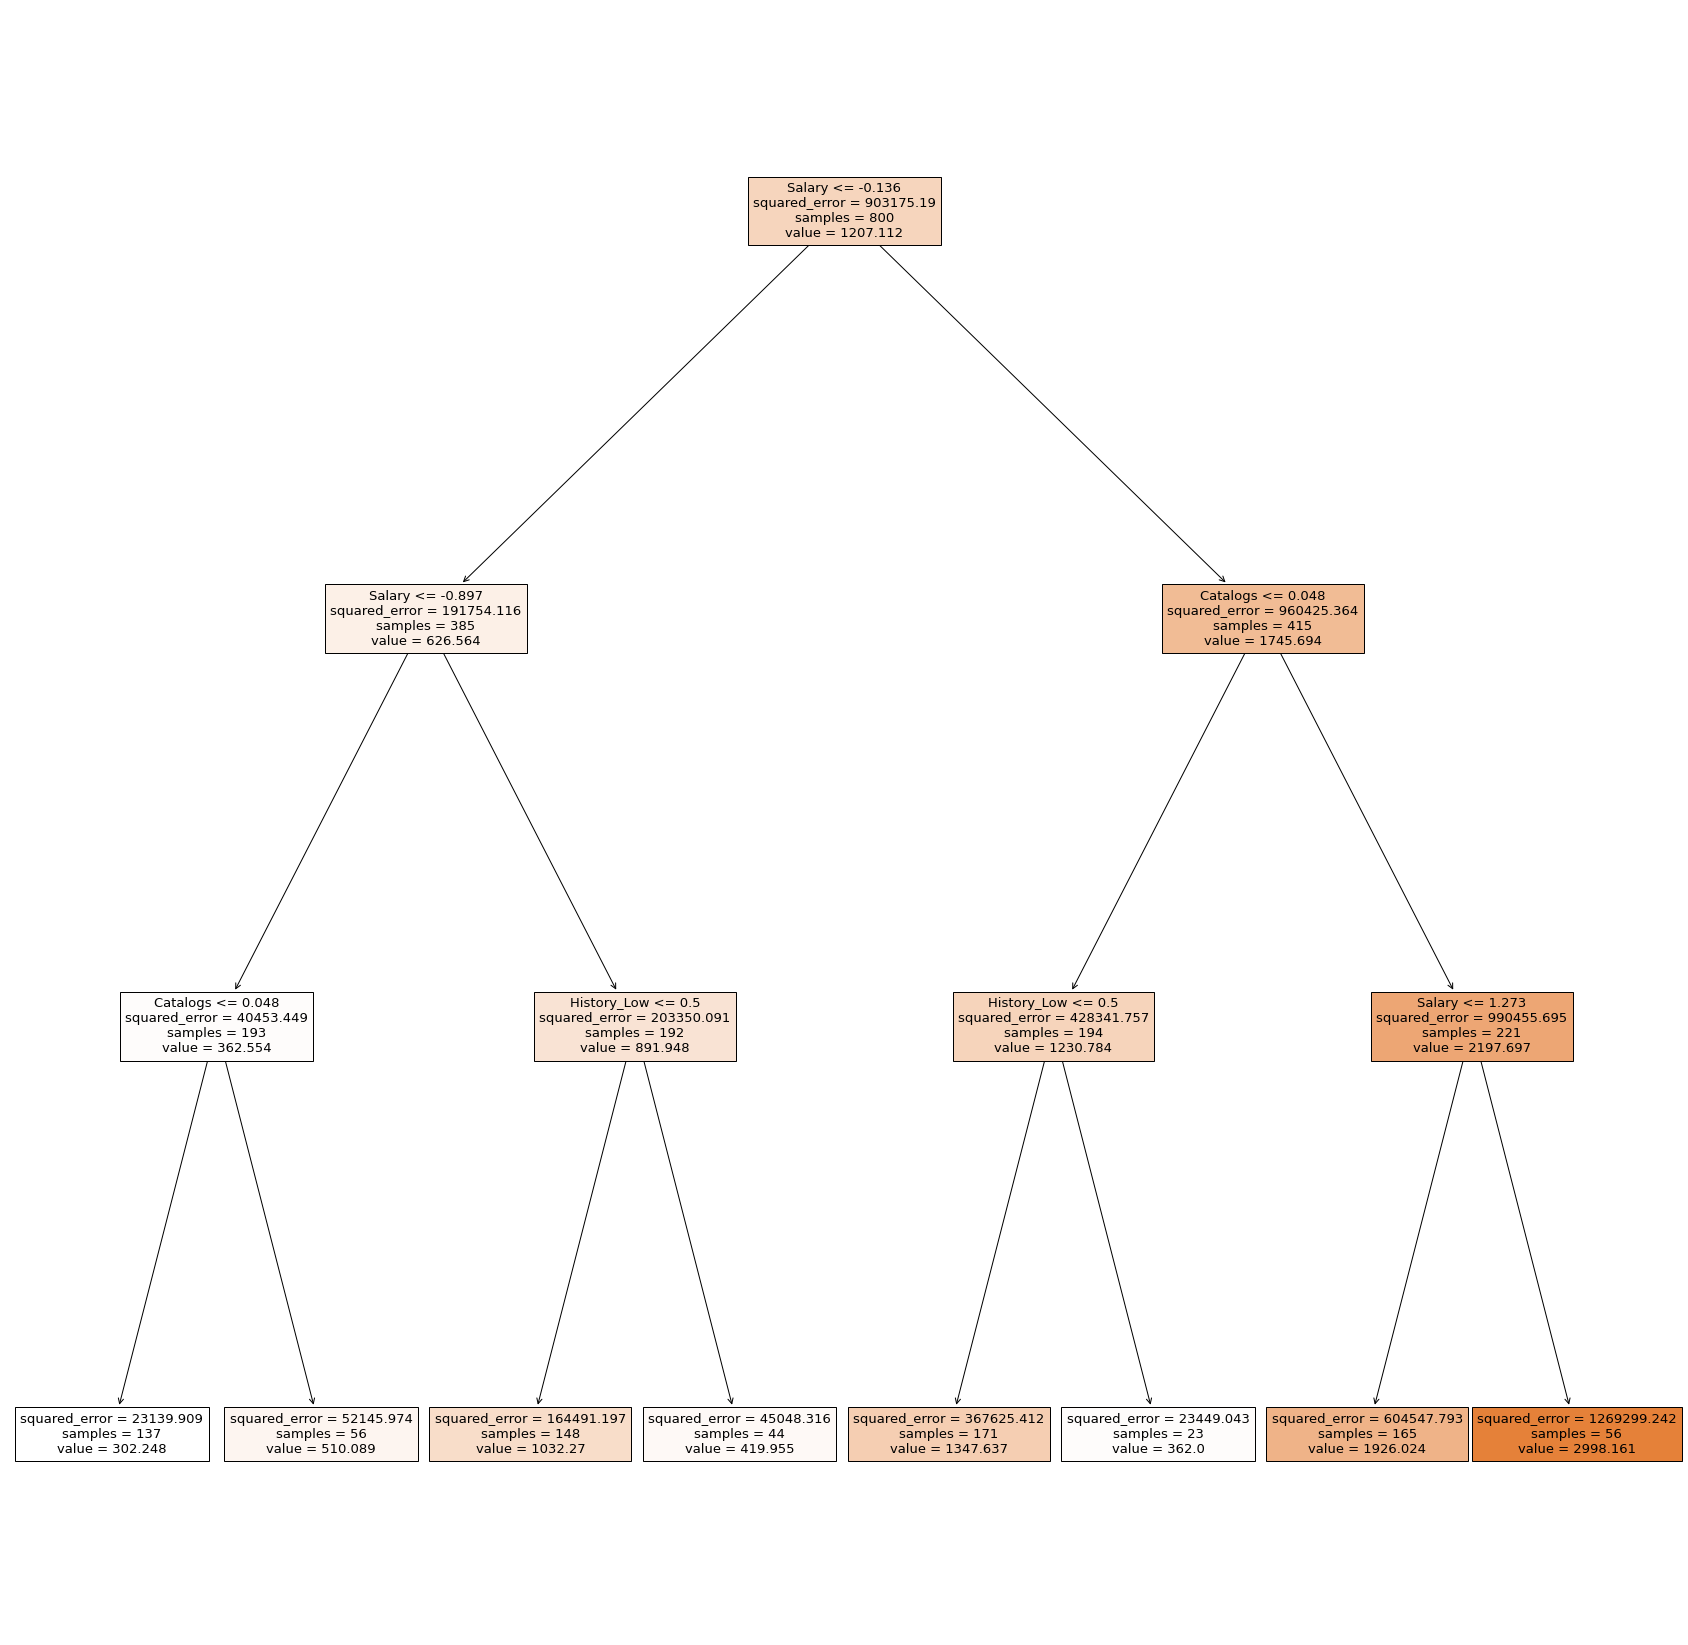

In [86]:
# Example for tree
import matplotlib.pyplot as plt
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(xtrain,ytrain)
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(clf,feature_names=list(xtrain.columns.values),class_names=['0','1'],filled=True);

In [89]:
ypred_depth3 = clf.predict(xtest)
xtest.head()

Salary  Children  Catalogs  Age_Old  Age_Young  Gender_Male  \
726 -0.977220         1 -0.405161        0          0            0   
243 -1.379167         0  1.407642        0          1            1   
342  0.807036         2  0.501240        0          0            1   
976  1.695895         3  1.407642        0          0            1   
919  2.019414         0 -1.311563        0          0            1   

     OwnHome_Rent  Married_Single  Location_Far  History_Low  History_Medium  \
726             1               1             0            1               0   
243             1               1             1            0               0   
342             0               1             1            0               0   
976             0               0             1            0               0   
919             0               0             0            0               0   

     History_aMissing  
726                 0  
243                 1  
342                 0  
976                 0  
919                 0

In [90]:
ypred_depth3

array([ 302.24817518,  510.08928571, 1926.02424242, 2998.16071429,
       1347.6374269 ,  302.24817518, 1926.02424242,  510.08928571,
       2998.16071429, 1347.6374269 , 1032.27027027,  510.08928571,
       1926.02424242, 2998.16071429, 1032.27027027, 2998.16071429,
       1347.6374269 , 1926.02424242,  302.24817518,  510.08928571,
       1926.02424242, 1032.27027027, 2998.16071429, 1347.6374269 ,
       1926.02424242, 1347.6374269 , 1347.6374269 , 1347.6374269 ,
       1926.02424242,  302.24817518,  302.24817518, 2998.16071429,
       1347.6374269 , 1347.6374269 , 1347.6374269 , 1032.27027027,
        510.08928571, 1926.02424242, 1926.02424242, 2998.16071429,
       1347.6374269 , 1032.27027027, 1032.27027027, 1926.02424242,
        510.08928571, 1032.27027027, 1032.27027027,  510.08928571,
        362.        , 1032.27027027, 1032.27027027, 1926.02424242,
        362.        ,  302.24817518, 1926.02424242, 1347.6374269 ,
       1032.27027027, 1347.6374269 ,  419.95454545, 1926.02424

In [87]:
treerules = tree.export_text(clf,feature_names=list(xtrain.columns.values))
print(treerules)

|--- Salary <= -0.14
|   |--- Salary <= -0.90
|   |   |--- Catalogs <= 0.05
|   |   |   |--- value: [302.25]
|   |   |--- Catalogs >  0.05
|   |   |   |--- value: [510.09]
|   |--- Salary >  -0.90
|   |   |--- History_Low <= 0.50
|   |   |   |--- value: [1032.27]
|   |   |--- History_Low >  0.50
|   |   |   |--- value: [419.95]
|--- Salary >  -0.14
|   |--- Catalogs <= 0.05
|   |   |--- History_Low <= 0.50
|   |   |   |--- value: [1347.64]
|   |   |--- History_Low >  0.50
|   |   |   |--- value: [362.00]
|   |--- Catalogs >  0.05
|   |   |--- Salary <= 1.27
|   |   |   |--- value: [1926.02]
|   |   |--- Salary >  1.27
|   |   |   |--- value: [2998.16]



In [91]:
(1,2),2

((1, 2), 2)

In [92]:
[i for i in range(0,4)] if bool(len("")) == "False" else print("That did not work")

That did not work


In [94]:
RunsScored= 23, 56, 67, 9, 56, 90, 41, 40, 104, 3 

BallsPlayed=45, 46, 90, 4, 44, 71, 70, 34, 81, 7

In [97]:
sum(RunsScored) / BallsPlayed 

TypeError: unsupported operand type(s) for /: 'tuple' and 'tuple'

In [98]:
data_type = ['int','float','string']
nums = ['1','2','3','4']
full_names = list(zip(data_type, nums))
print(full_names)

[('int', '1'), ('float', '2'), ('string', '3')]


In [99]:
import functools
a=[ 1 , 2 , 3 , ' 4' , '5' , '6' ]
l=list(map(lambda x : int(x) , a ))
print( type ( functools.reduce(lambda a, computed_val: a * computed_val, l)))

<class 'int'>


In [100]:
a={11,22,33}
a.add(22)
print(a)

{33, 11, 22}
